In [13]:
import apgpy as apg
import numpy as np
from apgwrapper import NumpyWrapper
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [14]:
n = 300
m = 1000
A = np.random.randn(m, n)
b = np.random.randn(m)
np.linalg.cond(A)

3.3098859560077045

In [15]:
U, s, V = np.linalg.svd(A, full_matrices=True)
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)
S = S**2

A = np.dot(U, np.dot(S, V))
np.linalg.cond(A)

10.955345041777001

In [16]:
AtA = np.dot(A.T, A)
Atb = np.dot(A.T, b)

In [17]:
eps = 1e-10

In [18]:
def quad_grad(y):
    return NumpyWrapper(np.dot(AtA, y.nparray) - Atb)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 2.96e-07
iter num 100, norm(Gk)/(1+norm(xk)): 2.31e-01, step-size: 2.73e-07
iter num 200, norm(Gk)/(1+norm(xk)): 2.66e-05, step-size: 1.98e-07
iter num 300, norm(Gk)/(1+norm(xk)): 2.41e-09, step-size: 2.28e-07
iter num 330, norm(Gk)/(1+norm(xk)): 8.40e-11, step-size: 1.71e-07
terminated


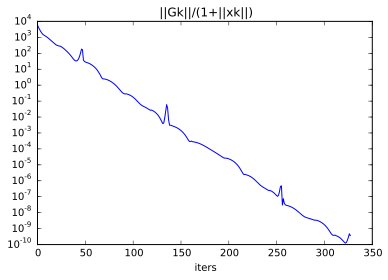

In [25]:
x = apg.solve(quad_grad, {}, np.zeros(n), eps = eps)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 2.96e-07
iter num 100, norm(Gk)/(1+norm(xk)): 1.65e+02, step-size: 5.22e-07
iter num 200, norm(Gk)/(1+norm(xk)): 3.82e+01, step-size: 2.28e-07
iter num 300, norm(Gk)/(1+norm(xk)): 5.06e+00, step-size: 6.17e-07
iter num 400, norm(Gk)/(1+norm(xk)): 1.38e+00, step-size: 3.77e-07
iter num 500, norm(Gk)/(1+norm(xk)): 2.49e-01, step-size: 2.00e-07
iter num 600, norm(Gk)/(1+norm(xk)): 4.53e-02, step-size: 5.42e-07
iter num 700, norm(Gk)/(1+norm(xk)): 1.35e-02, step-size: 3.15e-07
iter num 800, norm(Gk)/(1+norm(xk)): 2.53e-03, step-size: 2.15e-07
iter num 900, norm(Gk)/(1+norm(xk)): 8.01e-04, step-size: 1.23e-07
iter num 1000, norm(Gk)/(1+norm(xk)): 1.48e-04, step-size: 3.34e-07
iter num 1100, norm(Gk)/(1+norm(xk)): 3.22e-05, step-size: 2.50e-07
iter num 1200, norm(Gk)/(1+norm(xk)): 6.44e-06, step-size: 1.62e-07
iter num 1300, norm(Gk)/(1+norm(xk)): 1.66e-06, step-size: 4.39e-07
iter num 1400, norm(Gk)/(1+norm(xk)): 4.63e-07, step-size: 3.26e-

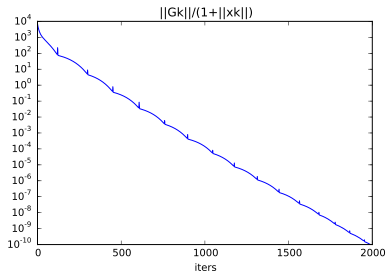

In [20]:
x_no_accleration = apg.solve(quad_grad, {}, np.zeros(n), eps = eps, use_gra=True, max_iters=10000)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 2.96e-07
iter num 100, norm(Gk)/(1+norm(xk)): 4.48e+01, step-size: 2.81e-07
iter num 200, norm(Gk)/(1+norm(xk)): 9.70e+00, step-size: 2.38e-07
iter num 300, norm(Gk)/(1+norm(xk)): 5.22e+00, step-size: 2.30e-07
iter num 400, norm(Gk)/(1+norm(xk)): 1.23e+00, step-size: 2.25e-07
iter num 500, norm(Gk)/(1+norm(xk)): 7.71e-01, step-size: 1.80e-07
iter num 600, norm(Gk)/(1+norm(xk)): 5.38e-01, step-size: 1.77e-07
iter num 700, norm(Gk)/(1+norm(xk)): 1.17e-01, step-size: 1.62e-07
iter num 800, norm(Gk)/(1+norm(xk)): 1.48e-01, step-size: 1.33e-07
iter num 900, norm(Gk)/(1+norm(xk)): 5.14e-02, step-size: 3.59e-07
iter num 1000, norm(Gk)/(1+norm(xk)): 6.17e-02, step-size: 3.75e-07
iter num 1100, norm(Gk)/(1+norm(xk)): 1.38e-02, step-size: 3.00e-07
iter num 1200, norm(Gk)/(1+norm(xk)): 1.19e-02, step-size: 3.24e-07
iter num 1300, norm(Gk)/(1+norm(xk)): 1.22e-02, step-size: 3.64e-07
iter num 1400, norm(Gk)/(1+norm(xk)): 2.68e-03, step-size: 3.13e-

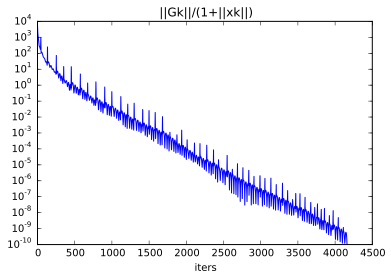

In [21]:
x_no_restart = apg.solve(quad_grad, {}, np.zeros(n), eps = eps, use_restart=False, max_iters=10000)

In [22]:
def cg(A, b, x=False, eps=1e-12, gen_plots=True):
    n = np.shape(A)[0]
    if not x:
        x = np.zeros(n)
    r = b - np.dot(A, x)
    p = np.copy(r)
    rsold = np.linalg.norm(r)**2

    max_iters = 10 * n # cg should only need n steps
    if gen_plots:
        errs = np.zeros(max_iters)
        import matplotlib.pyplot as plt

    k = 0
    for k in range(max_iters):
        Ap = np.dot(A, p)
        alpha = rsold / np.inner(p, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = np.linalg.norm(r)**2
        err = rsnew**0.5 / (1 + np.linalg.norm(x))
        if gen_plots:
            errs[k] = err

        if err < eps:
              break
        p = r + p * (rsnew / rsold)
        rsold=rsnew
        
    if gen_plots:
        errs = errs[1:k]
        plt.semilogy(errs[1:k])
        plt.xlabel('iters')
        plt.title('||rk|| / (1 + ||xk||')

    return x

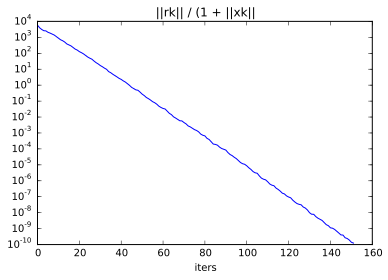

In [23]:
x_cg = cg(AtA, Atb, eps = eps)

In [24]:
np.linalg.norm(x - x_cg) / np.linalg.norm(x_cg)

AttributeError: 'numpy.ndarray' object has no attribute 'nparray'

In [ ]:
np.linalg.norm(np.dot(A,x) - b)

In [ ]:
np.linalg.norm(np.dot(A,x_cg) - b)

In [ ]:
import cvxpy as cp

z = cp.Variable(n)
objective = cp.Minimize(cp.norm(A * z - b))
p = cp.Problem(objective)
p.solve(verbose=True, solver=cp.SCS, eps=1e-12)
x_scs = z.value.A1
np.linalg.norm(np.dot(A,x_scs) - b)

In [ ]:
np.linalg.norm(x_scs - x_cg) / np.linalg.norm(x_cg)

In [ ]:
plt.plot(x, label='apg')
plt.plot(x_cg, label='cg')
plt.plot(x_scs, label='scs')
plt.legend()